In [98]:
import numpy as np
import pandas as pd

In [99]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [100]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2719,ham,Go where n buy? Juz buy when we get there lar.,NaN,NaN,NaN
4876,ham,The world's most happiest frnds never have the...,NaN,NaN,NaN
2925,ham,Im done. Just studyn in library,NaN,NaN,NaN
1253,ham,Mum say we wan to go then go... Then she can s...,NaN,NaN,NaN
3857,ham,R u still working now?,NaN,NaN,NaN


# 1. DATA CLEANING


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [102]:
# Since most values of col 2,3 and 4 are null, so we will delete them
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
#inplace=True is used to permanantly save the changes in table to the original table

In [103]:
df.sample(5)

,v1,v2
2884,ham,ÌÏ still attending da talks?
3883,spam,A link to your picture has been sent. You can ...
5180,ham,Babe! I fucking love you too !! You know? Fuck...
4205,ham,"Get the door, I'm here"
4919,ham,"G says you never answer your texts, confirm/deny"


In [104]:
# replacing col names
df.rename(columns={'v1':'Target', 'v2': 'Text'}, inplace=True)

In [105]:
df.sample(5)

,Target,Text
2146,ham,So can collect ur laptop?
3548,ham,"I got like $ &lt;#&gt; , I can get some more l..."
1068,spam,Someone U know has asked our dating service 2 ...
2859,ham,I want to be there so i can kiss you and feel ...
2004,ham,"Goodmorning, today i am late for &lt;DECIMAL&..."


In [106]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [108]:
df['Target']=encoder.fit_transform(df['Target'])

In [109]:
df.sample(5)

,Target,Text
3859,0,Yep. I do like the pink furniture tho.
1127,0,"Height of \Oh shit....!!\"" situation: A guy th..."
1138,0,What * u wearing?
2739,0,Are you this much buzy
3126,0,Thats cool. i liked your photos. You are very ...


In [110]:
#check for null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [111]:
#check for duplicates
df.duplicated().sum()

403

In [112]:
df=df.drop_duplicates(keep='first')


In [113]:
#check for duplicates again
df.duplicated().sum()

0

In [118]:
df.shape

(5169, 2)

# 2. EDA

In [119]:
#checking for number of ham and spams and plotting it using a pie chart
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

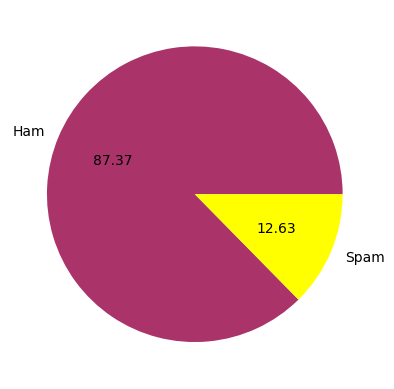

In [120]:
import matplotlib.pyplot as plt
colors = ["#AA336A", "#FFFF00"]
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f", colors=colors )
plt.show()

In [121]:
import nltk


In [122]:
#adding additional columns 
df['Num_Characters']=df['Text'].apply(len)
df['Num_Words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['Num_Sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [123]:
df.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [124]:
df[['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [125]:
df[df['Target']==0][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [126]:
df[df['Target']==1][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [127]:
import seaborn as sns

<Axes: xlabel='Num_Characters', ylabel='Count'>

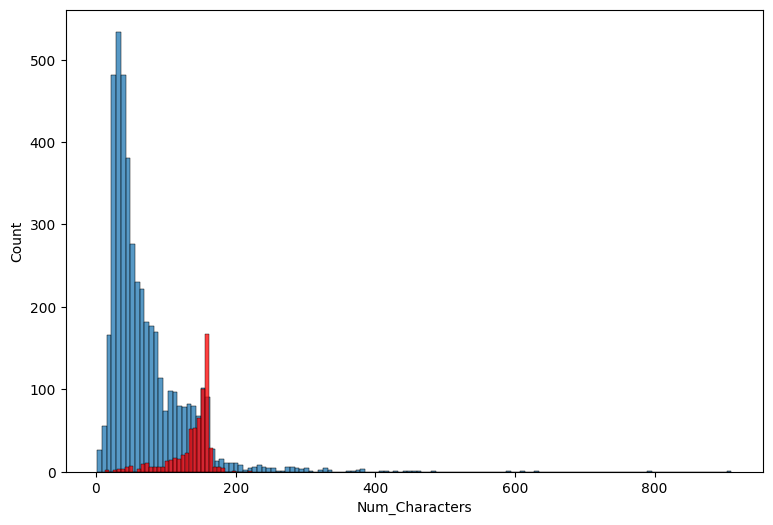

In [128]:
plt.figure(figsize=(9, 6))
sns.histplot(df[df['Target']==0]['Num_Characters'])
sns.histplot(df[df['Target']==1]['Num_Characters'], color='red')

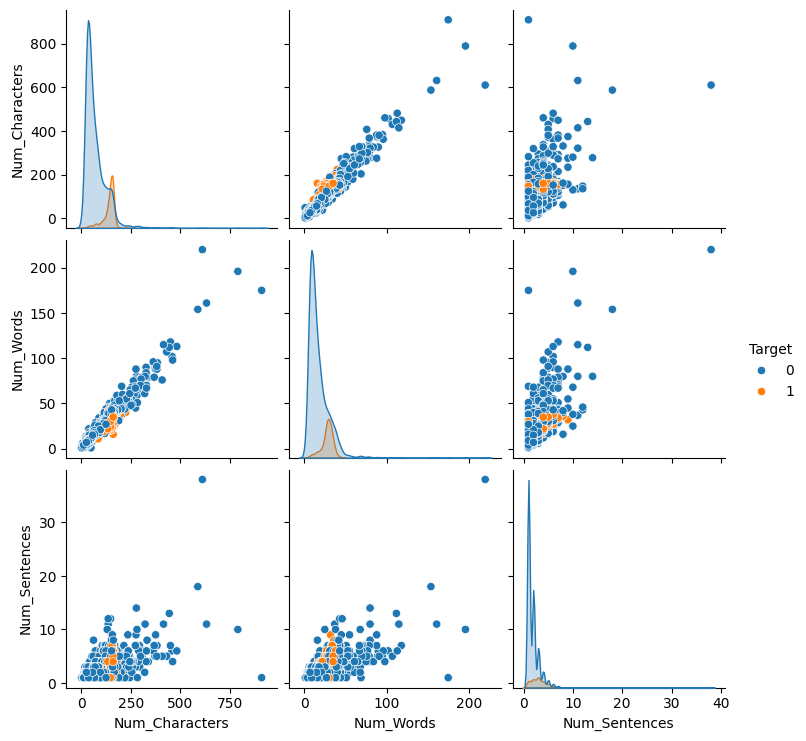

In [129]:
sns.pairplot(df, hue='Target')

In [130]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

# 3. DATA PREPROCESSING
1. LOWER CASE
2. TOKENIZATION
3. REMOVAL OF SPECIAL CHARACTERS
4. REMOVAL OF STOP WORDS OR PUNCTUATION
5. STEMMING

In [131]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()


In [133]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [134]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [135]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [136]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [139]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [140]:
df.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


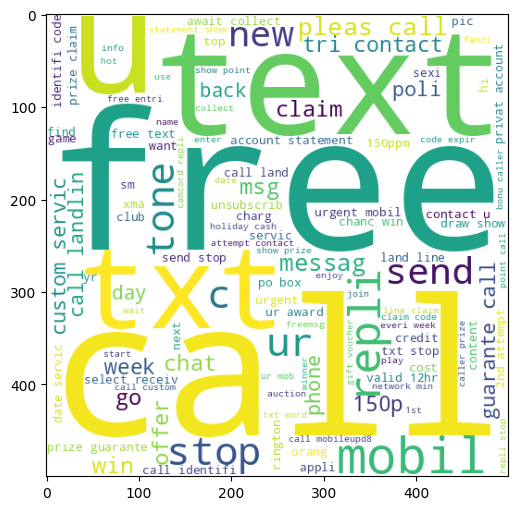

In [152]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

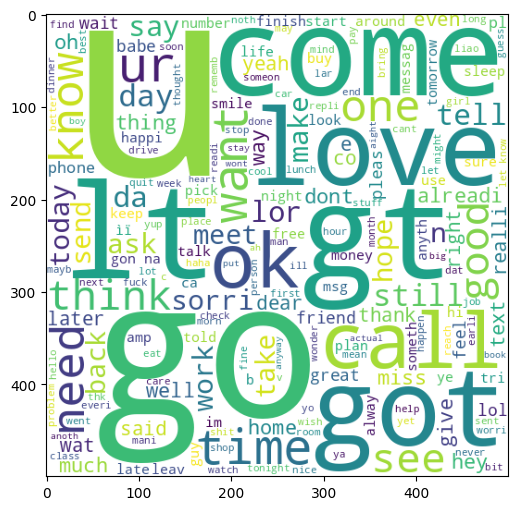

In [154]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [156]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

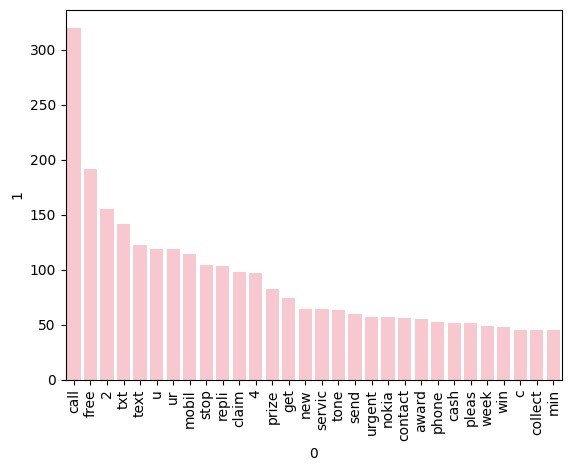

In [207]:
df2=pd.DataFrame(Counter(spam_corpus).most_common(30))
a=df2[0]
b=df2[1]
sns.barplot(x=a, y=b, color='pink')
plt.xticks(rotation='vertical')
plt.show()

In [210]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

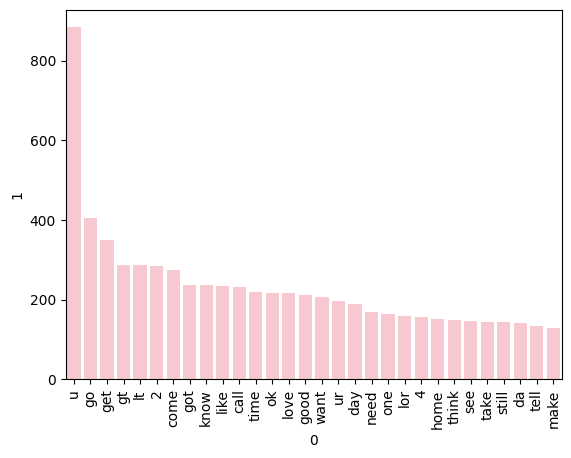

In [211]:
df3=pd.DataFrame(Counter(ham_corpus).most_common(30))
c=df3[0]
d=df3[1]
sns.barplot(x=c, y=d, color='pink')
plt.xticks(rotation='vertical')
plt.show()

# 4. MODEL BUILDING

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [216]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()
y = df['Target'].values

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [221]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [225]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [226]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [228]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [229]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [230]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


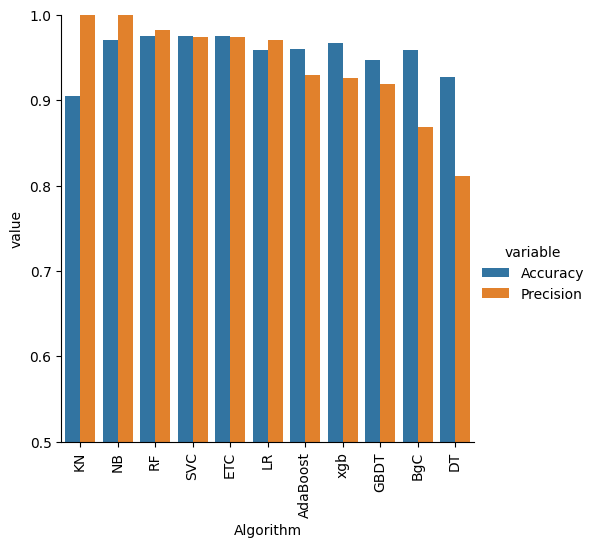

In [242]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [243]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))